# Failed attempt to get via curl

In [56]:
import requests

In [66]:
url = "https://api.bseindia.com/RealTimeBseIndiaAPI/api/GetSensexData/w"
headers = {"Referrer Policy":"strict-origin-when-cross-origin", "Remote Address":"[2606:2800:249:8ce7:b744:345d:88d5:a78f]:443",'Content-Type': 'application/json; charset=utf-8'}


In [67]:
data = {
    'fmdt': "10-07-1997",
    'index': 'All',
    'period': 'D',
    'todt': "10-07-1997",
}

In [68]:
r = requests.get(url, headers=headers)
r.status_code

400

In [45]:
import pandas as pd

In [70]:
# pd.read_html(r.content, match="")

In [19]:
res = requests.post(url, data=data)

In [20]:
res.request.body

In [23]:
data

{'fmdt': '10%2F07%2F1997',
 'index': 'All',
 'period': 'D',
 'todt': '10%2F07%2F1997'}

In [69]:
# requests.post("https://api.bseindia.com/BseIndiaAPI/api/IndexArchDailyAll/w?fmdt=10%2F07%2F1997&index=All&period=D&todt=10%2F07%2F1997", params={""})

# Read from csv
#### https://api.bseindia.com/RealTimeBseIndiaAPI/api/GetSensexData/w

In [177]:
import os

import matplotlib.pyplot as plt
import pandas as pd

In [104]:
data_path = os.path.abspath(os.path.join("..", "data", "BSE"))
data_files = [file for file in os.listdir(data_path) if file.endswith(".csv")]

In [180]:
data = pd.DataFrame()
for i, file in enumerate(data_files):
    print(f"[{i+1}/{len(data_files)}] reading file {file}")
    df = pd.read_csv(os.path.join(data_path, file), usecols=["Date", "Open", "High", "Low", "Close"]).set_index("Date")
    df.index = pd.to_datetime(df.index)
    if len(data):
        data = data.join(df["Close"].rename(file.removesuffix(".csv")).to_frame(), how="outer")
    else:
        data = df["Close"].rename(file.rstrip(".csv")).to_frame()
            

[1/23] reading file all_cap.csv
[2/23] reading file auto.csv
[3/23] reading file commodities.csv
[4/23] reading file consumer_discretionary.csv
[5/23] reading file consumer_durables.csv
[6/23] reading file energy.csv
[7/23] reading file enhanced_value.csv
[8/23] reading file financial_services.csv
[9/23] reading file FMCG.csv
[10/23] reading file healthcare.csv
[11/23] reading file industrials.csv
[12/23] reading file IT.csv
[13/23] reading file low_vol.csv
[14/23] reading file metal.csv
[15/23] reading file momentum.csv
[16/23] reading file oil_gas.csv
[17/23] reading file power.csv
[18/23] reading file psu.csv
[19/23] reading file quality.csv
[20/23] reading file realty.csv
[21/23] reading file sensex.csv
[22/23] reading file telecom.csv
[23/23] reading file utilities.csv


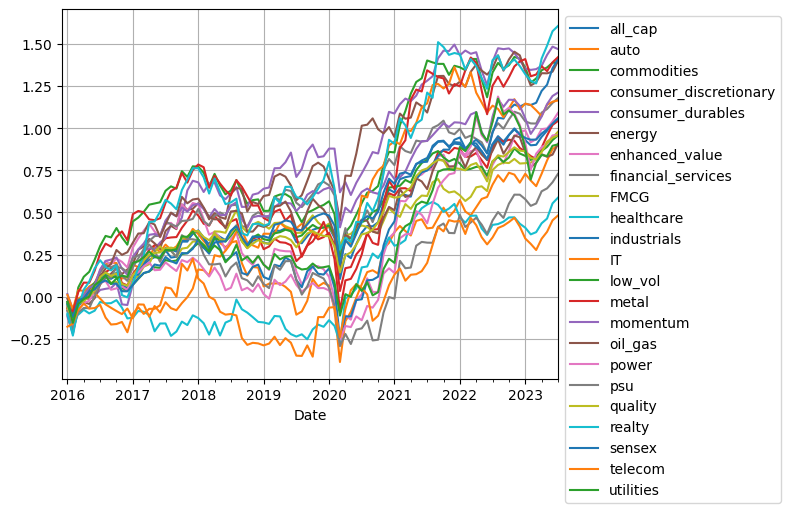

In [181]:
data.resample("m").last().dropna().pct_change().cumsum().plot(grid=True)
plt.legend(bbox_to_anchor=(1,1), loc=0)

In [182]:
data.to_pickle(os.path.join(data_path, "BSE_index_levels.pkl"))

In [183]:
bse_p = pd.read_pickle(os.path.join(data_path, "BSE_index_levels.pkl"))

In [187]:
bse_p.dropna().head()

,all_cap,auto,commodities,consumer_discretionary,consumer_durables,energy,enhanced_value,financial_services,FMCG,healthcare,...,metal,momentum,oil_gas,power,psu,quality,realty,sensex,telecom,utilities
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-14,2944.98,17893.03,1658.07,2658.54,11885.10,2444.15,227.04,3643.45,7686.32,16256.60,...,7068.35,435.79,8995.64,1817.79,6487.44,532.32,1264.09,25150.35,1300.08,1453.48
2015-12-15,2963.02,18127.31,1667.19,2684.91,12062.84,2474.51,227.44,3659.75,7766.81,16326.29,...,7052.92,438.82,9061.59,1820.02,6500.46,536.42,1275.84,25320.44,1297.25,1452.55
2015-12-16,2979.73,18035.69,1672.57,2674.97,11993.02,2502.30,229.51,3696.68,7721.64,16411.28,...,7074.22,441.30,9216.95,1843.72,6586.76,537.03,1287.62,25494.37,1328.65,1474.50
2015-12-17,3019.58,18276.41,1706.85,2719.83,12009.55,2540.32,234.37,3746.82,7779.97,16639.03,...,7247.93,447.05,9280.98,1870.36,6648.37,543.14,1304.33,25803.78,1335.39,1495.56
2015-12-18,2999.28,18149.91,1691.69,2710.17,12130.47,2517.04,233.80,3716.83,7731.22,16523.20,...,7183.67,445.83,9216.97,1872.83,6629.25,540.49,1305.22,25519.22,1336.39,1500.21
